In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [44]:
df  = pd.read_csv('C:/Users/JAINY/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/JAINY/Desktop/test.csv')

In [45]:
df_to_np = df.values
x_test = df_test.values
x_train = df_to_np[:,1:]
y_train = df_to_np[:,0]
print(x_test.shape)

(28000, 784)


In [46]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


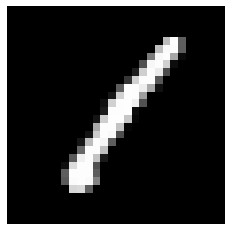

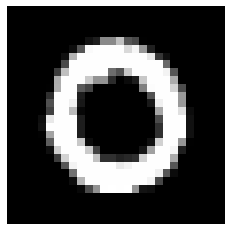

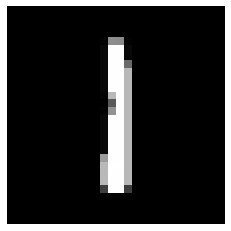

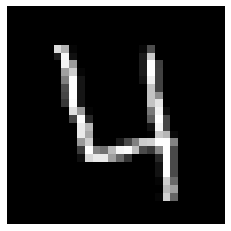

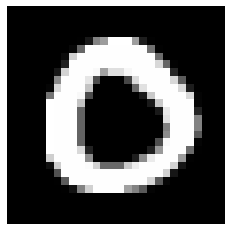

In [54]:
for i in range(5):
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(42000, 1)


In [7]:
from keras.layers import *

from keras.models import Sequential
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard


model = Sequential()

Using TensorFlow backend.
C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [8]:
# image reshaping
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

def preprocess_testdata(X):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
   # Y = to_categorical(Y)
    return X



XTrain,YTrain = preprocess_data(x_train,y_train)
# padding on train data
XTrain      = np.pad(XTrain, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print(XTrain.shape,YTrain.shape)

XTest = preprocess_testdata(x_test)
# padding in test data
XTest = np.pad(XTest, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(XTest.shape)



(42000, 32, 32, 1) (42000, 10)
(28000, 32, 32, 1)


In [9]:
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,1)))
model.add(MaxPool2D((2,2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(layers.Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(layers.Dense(units=10, activation = 'softmax'))

W0806 06:28:39.325104  6356 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 06:28:39.332729  6356 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 06:28:39.364997  6356 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0806 06:28:39.393128  6356 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use t

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0806 06:28:40.015147  6356 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
his = model.fit(XTrain, YTrain, epochs=44, batch_size=128)

W0806 06:28:40.367264  6356 deprecation.py:323] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/44
42000/42000 [==============================] - 122s 3ms/step - loss: 0.3022 - acc: 0.9035
Epoch 2/44
42000/42000 [==============================] - 100s 2ms/step - loss: 0.1122 - acc: 0.9650
Epoch 3/44
42000/42000 [==============================] - 95s 2ms/step - loss: 0.0876 - acc: 0.9728
Epoch 4/44
42000/42000 [==============================] - 96s 2ms/step - loss: 0.0704 - acc: 0.9777
Epoch 5/44
42000/42000 [==============================] - 98s 2ms/step - loss: 0.0642 - acc: 0.9793
Epoch 6/44
42000/42000 [==============================] - 102s 2ms/step - loss: 0.0566 - acc: 0.9825
Epoch 7/44
42000/42000 [==============================] - 98s 2ms/step - loss: 0.0556 - acc: 0.9820
Epoch 8/44
42000/42000 [==============================] - 93s 2ms/step - loss: 0.0516 - acc: 0.9837
Epoch 9/44
42000/42000 [==============================] - 93s 2ms/step - loss: 0.0448 - acc: 0.9854
Epoch 10/44
42000/42000 [==============================] - 99s 2ms/step - loss: 0.0424 - acc: 0.9

In [18]:
results = model.predict_classes(XTest, batch_size=128)

In [19]:
#file = np.savetxt('C:/Users/JAINY/Desktop/ans2.csv',results,delimiter=","'w+',header='Id')
